# 종목코드 크롤링

In [1]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.ktb.co.kr/trading/popup/itemPop.jspx' # KTB 투자증권 종목코드 조회 사이트
print(url)
webpage = requests.get(url) 
soup = BeautifulSoup(webpage.content, 'html.parser')

https://www.ktb.co.kr/trading/popup/itemPop.jspx


In [2]:
td = soup.find_all("td") # td 태그
print(td[0])
print(td[1])

<td>000020</td>
<td><a href="javascript:fnOnClick('1','000020','동화약품                                ','040','045','1','KOSPI','009','KR7000020008')">동화약품                                </a></td>


In [3]:
for i in range(6):
     print(td[i].get_text()) # td 태그 중 text만 출력
                            # 종목 코드 번호, 회사명으로 반복되어 이루어져있음

000020
동화약품                                
000040
KR모터스                                
000050
경방                                    


In [4]:
code_num = [] # 종목 코드번호 list 생성
code_name = [] # 종목 이름 list 생성

td_len = len(soup.find_all('td')) # td 태그의 길이

for i in range(td_len):
    if (i % 2 == 0): # td 태그 중 짝수 번째는 종목 코드번호이므로 code_num 리스트에 append
        code_num.append(td[i].get_text())
    if (i % 2 == 1): # td 태그 중 홀수 번째는 종목 이름이므로 code_name 리스트에 append 
        code_name.append(td[i].get_text()) 
    

In [5]:
code_num[:5] # 종목 코드번호 list

['000020', '000040', '000050', '000060', '000070']

In [6]:
code_name[:5]   # 종목 이름 list
            # 문자열에 빈공간이 많다.

['동화약품                                ',
 'KR모터스                                ',
 '경방                                    ',
 '메리츠화재                              ',
 '삼양홀딩스                              ']

In [7]:
for i in range(len(code_name)):
    code_name[i] = code_name[i].split(' ')[0] # 필요한 문자열은 왼쪽에 붙어있으므로 공백(' ')을 기준으로 split한 후 첫번째 값만 가져온다.
code_name[:5]

['동화약품', 'KR모터스', '경방', '메리츠화재', '삼양홀딩스']

In [8]:
import pandas as pd

stock_code = pd.DataFrame({'종목 이름' : code_name, '종목 코드' : code_num}) 
stock_code.head(2) # code_name과 code_num을 이용해 dataframe 생성

,종목 이름,종목 코드
0,동화약품,000020
1,KR모터스,000040


# 주식 데이터 가져오기

In [10]:
import pandas_datareader as pdr

sam = pdr.get_data_yahoo('005930.KS', start='2020-01-01', end='2020-12-31') # 삼성전자의 2020년 주식 데이터
sam.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,56000.0,55000.0,55500.0,55200.0,12993228.0,52058.132812
2020-01-03,56600.0,54900.0,56000.0,55500.0,15422255.0,52341.054688


In [11]:
sam_C = sam.loc[:,'Close'] # 삼성전자의 종가(Close) 데이터
sam_C.head()

Date
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-06    55500.0
2020-01-07    55800.0
2020-01-08    56800.0
Name: Close, dtype: float64

# 서울시 코로나 확진자 데이터 가져오기

In [12]:
import pandas as pd

corona = pd.read_csv('seoul_corona.csv')
corona.head(2)

/Users/parkdonghyeok/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (4,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,213114,2021-12-23,NaN,NaN,NaN,종로구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-24 10:48,2021-12-24 10:48,Y
1,213113,2021-12-23,NaN,NaN,NaN,송파구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-24 10:48,2021-12-24 10:48,Y


In [13]:
corona_date = corona.groupby('확진일')['연번'].count() # 일자별 확진자 수를 확인하기 위해 '확진일'을 기준으로 groupby한 후 '연번'을 count
corona_date.head(3)

확진일
2020-01-24    1
2020-01-30    3
2020-01-31    3
Name: 연번, dtype: int64

In [14]:
corona_date = corona_date.to_frame(name='확진자') # 데이터프레임으로 변경
corona_date.head(3)

,확진자
확진일,
2020-01-24,1
2020-01-30,3
2020-01-31,3


In [15]:
corona_date['확진일'] = corona_date.index # 인덱스를 '확진일' column으로 이동
corona_date.head(2)

,확진자,확진일
확진일,,
2020-01-24,1,2020-01-24
2020-01-30,3,2020-01-30


In [16]:
corona_date.reset_index(drop = True, inplace = True) # 인덱스 초기화
corona_date['확진일'] = pd.to_datetime(corona_date['확진일'])
corona_date.head(2)

,확진자,확진일
0,1,2020-01-24
1,3,2020-01-30


In [17]:
corona_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   확진자     668 non-null    int64         
 1   확진일     668 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.6 KB


In [18]:
from jupyterthemes import jtplot # 시각화 테마 변경
jtplot.style(theme = 'monokai') 

import matplotlib.pyplot as plt # 한글 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. 코로나 확진자 그래프와 가장 비슷한 주식 데이터는 무엇일까?

In [30]:
len(stock_code)

3281

In [44]:
import time
import numpy as np
start = time.time()  # 시작 시간 저장

result_diff = 999
result_stock = ''

#for i in range(0,len(stock_code)):
for i in range(100):
    try:
        code_ = stock_code.iloc[i, 1] + '.KS' # stock_code의 종목코드를 하나씩 가져와서 코드 생성
        stock = pdr.get_data_yahoo(code_, start='2020-01-24', end='2021-12-23') # 코드를 이용해 주식 데이터 불러오기

        stock_C = stock.loc[:,'Close'] # 종가(Close) 데이터
        stock_C = stock_C.to_frame(name='주가') # 데이터프레임으로 변경
        stock_C['날짜'] = stock_C.index # 인덱스의 Date를 날짜 col로 이동
        stock_C.reset_index(drop = True, inplace = True) # 인덱스 초기화

        df = pd.merge(stock_C, corona_date, left_on = '날짜', right_on= '확진일', how = 'inner')
        df['확진자'] = np.log(df['확진자']) # 로그변환

        df['주가'] = (df['주가'] - df['주가'].min()) / (df['주가'].max() - df['주가'].min()) # Min_Max 정규화
        df['확진자'] = (df['확진자'] - df['확진자'].min()) / (df['확진자'].max() - df['확진자'].min()) # Min_Max 정규화
        df['diff ** 2'] = (df['주가'] - df['확진자']) ** 2 # 주가와 확진자의 차이의 제곱
        diff_sum = df['diff ** 2'].sum() # 차이의 제곱의 합

        if diff_sum < result_diff and diff_sum != 0:
            
            result_diff = diff_sum
            result_stock = stock_code.iloc[i, 1]
            result_df = df
            print('종목 코드 : ', result_stock, '     diff_sum : ', round(result_diff, 2), i)
        
    except KeyError : # 종목 데이터를 불러오는 과정에서 날짜에 해당하는 데이터가 없으면 오류 발생, 예외처리
        print(stock_code.iloc[i, 0] + '종목을 불러오는데 오류가 발생하여 건너뛰었습니다.' + '(' , i ,'번째 실행)' )
            

print("time :", time.time() - start)  # 코드 진행 시간 확인

종목 코드 :  000020      diff_sum :  41.02 0
종목 코드 :  000040      diff_sum :  20.58 1
종목 코드 :  000050      diff_sum :  13.42 2
종목 코드 :  000075      diff_sum :  12.1 5
종목 코드 :  000270      diff_sum :  11.31 24
종목 코드 :  000370      diff_sum :  10.43 28
종목 코드 :  000815      diff_sum :  9.03 50
종목 코드 :  001070      diff_sum :  8.71 69
time : 250.7037479877472


In [46]:
code_

'001529.KS'

In [47]:
stock_name = stock_code[stock_code['종목 코드'] == code_.split('.')[0]].iloc[0, 0]
stock_name

'동양3우B'

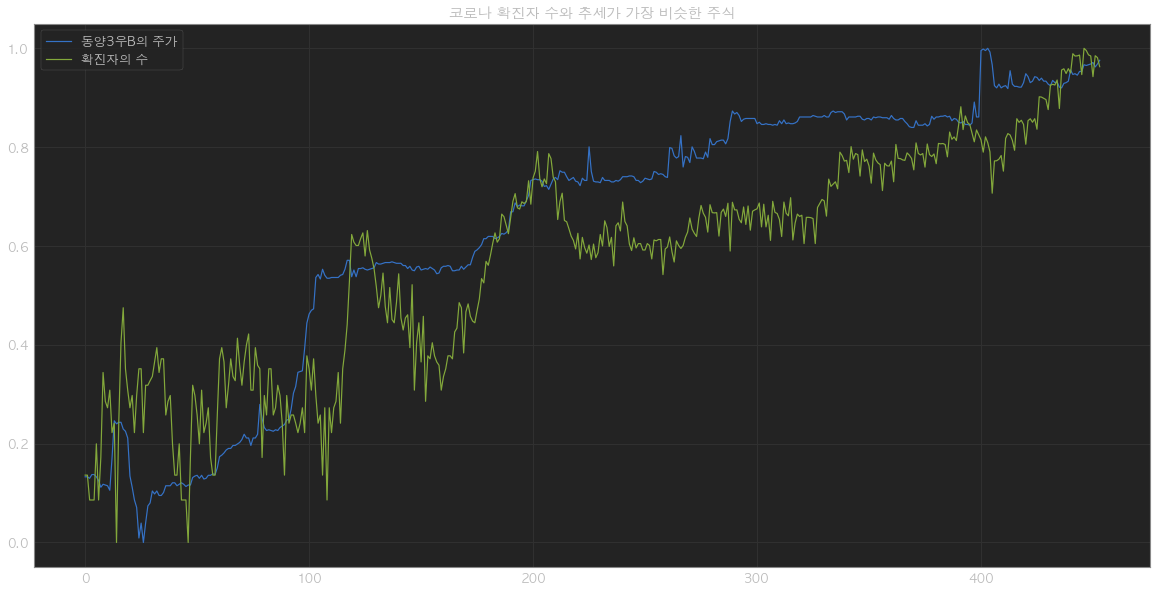

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))
plt.title('코로나 확진자 수와 추세가 가장 비슷한 주식')
plt.plot(result_df['주가'], label = stock_name + '의 주가')
plt.plot(result_df['확진자'], label = '확진자의 수')

plt.legend()
plt.show()

# 2. 오늘 삼성전자가 상승(하락)했다면 일주일 뒤 상승(하락)할 확률이 
# 가장 높은 주식은 무엇인가?

In [49]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import date, timedelta

sam = pdr.get_data_yahoo('005930.KS', start='2021-01-01', end='2021-12-31') # 삼성전자의 2020년 주식 데이터
sam_C = sam['Close']
sam_C = sam_C.to_frame(name='주가') # 데이터프레임으로 변경
sam_C['date'] = sam_C.index # 인덱스의 Date를 날짜 col로 이동
sam_C.reset_index(drop = True, inplace = True) # 인덱스 초기화
sam_C['date'] = sam_C['date'] - timedelta(7) # 날짜를 일주일 전으로 바꿔주기
sam_C['up_down'] = 2
for i in range(len(sam_C) - 1):
    if (sam_C.iloc[i, 0] < sam_C.iloc[i + 1, 0]): # 주가가 전날보다 다음날 상승했다면
        sam_C.iloc[i, 2] = 1
    elif (sam_C.iloc[i, 0] >= sam_C.iloc[i + 1, 0]): # 주가가 전날보다 다음날 하락했거나 같다면
        sam_C.iloc[i, 2] = 0
        
sam_C

,주가,date,up_down
0,83000,2020-12-28,1
1,83900,2020-12-29,0
2,82200,2020-12-30,1
3,82900,2020-12-31,1
4,88800,2021-01-01,1
...,...,...,...
243,80500,2021-12-17,0
244,80200,2021-12-20,1
245,80300,2021-12-21,0
246,78800,2021-12-22,0


In [63]:
import time
start = time.time()  # 시작 시간 저장

result_max = 0
result_min = 999
result_max_code = ''
result_min_code = ''
result_list = []
result_max_list = []
result_min_list = []

for i in range(100):
#for i in range(0,len(stock_code)):    
    try:
        code_ = stock_code.iloc[i, 1] + '.KS' # stock_code의 종목코드를 하나씩 가져와서 코드 생성
        stock = pdr.get_data_yahoo(code_, start='2020-12-28', end='2021-12-23') # 코드를 이용해 주식 데이터 불러오기

        stock_C = stock.loc[:,'Close'] # 종가(Close) 데이터
        stock_C = stock_C.to_frame(name='주가') # 데이터프레임으로 변경
        stock_C['날짜'] = stock_C.index # 인덱스의 Date를 날짜 col로 이동
        stock_C.reset_index(drop = True, inplace = True) # 인덱스 초기화

        stock_C['up_down'] = 3 # 일치하는 날을 체크할 col 추가
        
        for i in range(len(stock_C) - 1):
            if (stock_C.iloc[i, 0] < stock_C.iloc[i + 1, 0]): # 주가가 전날보다 다음날 상승또는 같다면 1
                stock_C.iloc[i, 2] = 1
            elif (stock_C.iloc[i, 0] >= stock_C.iloc[i + 1, 0]): # 주가가 전날보다 다음날 하락했다면 0
                stock_C.iloc[i, 2] = 0
        
        df = pd.merge(sam_C,stock_C, left_on = 'date', right_on= '날짜', how = 'inner').reset_index() # date와 날짜를 기준으로 merge
        
        result = 0
        
        for i in range(len(df)):
            if (df.iloc[i, 3] == df.iloc[i, 6]): # 일주일 전 삼성이 상승 또는 하락했을때 일주일 후 똑같이 상승 또는 하락 했다면
                result += 1
        
        result_list.append(result)
        
        if result > result_max: # result 값이 이 전까지의 result의 최대값보다 크다면 
            result_max = result # result_max 값 교체
            result_max_code = code_ # result_max에 해당하는 code
            result_max_list.append(result_max_code)
            print('종목 코드 : ' , result_max_code, '     일치하는 날의 최대값' , result_max)
            
        elif result < result_min:
            result_min = result
            result_min_code = code_
            result_min_list.append(result_max_code)
            print('종목 코드 : ' , result_min_code, '     일치하는 날의 최소값' , result_min)
    
    except KeyError :
        print(stock_code.iloc[i, 0] + '종목을 불러오는데 오류가 발생하여 건너뛰었습니다.')

print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

종목 코드 :  000020.KS      일치하는 날의 최대값 111
종목 코드 :  000040.KS      일치하는 날의 최대값 131
종목 코드 :  000050.KS      일치하는 날의 최소값 112
종목 코드 :  000145.KS      일치하는 날의 최대값 135
종목 코드 :  000157.KS      일치하는 날의 최대값 147
종목 코드 :  000990.KS      일치하는 날의 최소값 111
종목 코드 :  000995.KS      일치하는 날의 최소값 106
time : 270.16447591781616


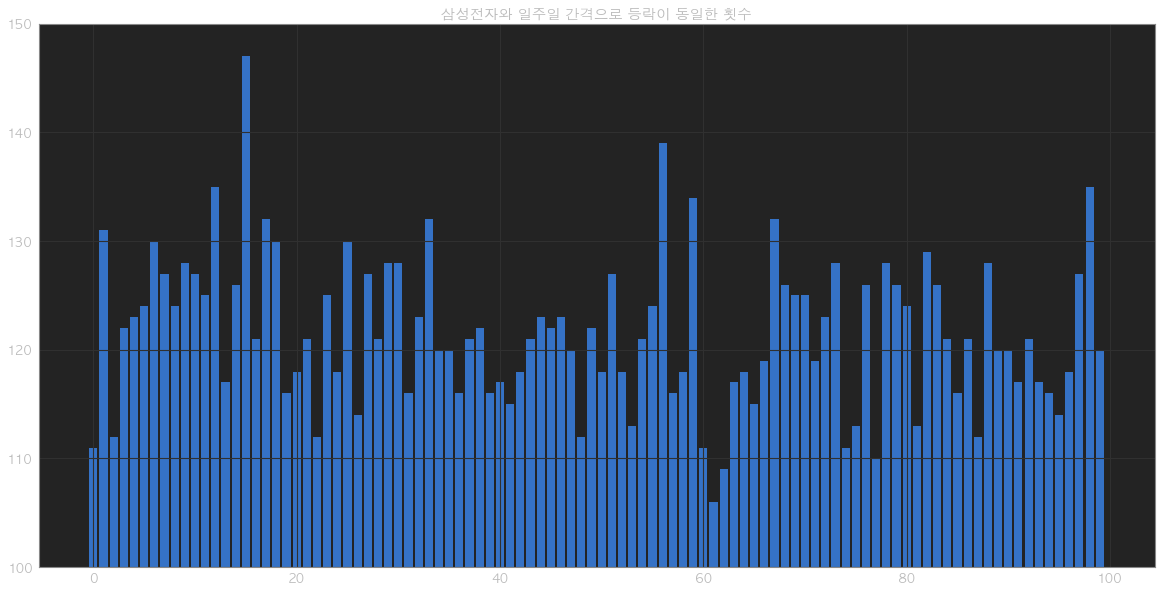

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))
plt.title('삼성전자와 일주일 간격으로 등락이 동일한 횟수')
plt.bar(range(100), result_list)
plt.ylim((100, 150))
plt.show()

In [66]:
stock_code[stock_code['종목 코드'] == result_max_code.split('.')[0]].iloc[0, 0]
# 일치 횟수가 가장 많은 종목

'두산2우B'

In [60]:
result_max / len(df) # 비율

0.6228813559322034

In [67]:
stock_code[stock_code['종목 코드'] == result_min_code.split('.')[0]].iloc[0, 0]
# 일치 횟수가 가장 적은 종목

'DB하이텍1우'

In [68]:
result_min / len(df) # 비율

0.4491525423728814